In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 import tensorflow as tf
 import numpy as np
 from tensorflow import keras
 from tensorflow.keras import layers
 import matplotlib.pyplot as plt
 from tensorflow.keras.models import Sequential
 from tensorflow.keras.models import load_model
 from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras.preprocessing import image
 import pandas as pd

In [ ]:
 data_dir = '/content/drive/MyDrive/brain'

In [ ]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [ ]:
train_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="binary",subset="training")


Found 914 images belonging to 1 classes.


In [ ]:
val_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="binary", subset="validation")


Found 228 images belonging to 1 classes.


In [ ]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(1,activation="sigmoid")])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       200,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 205,761 (803.75 KB)

 Trainable params: 205,761 (803.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(train_gen,epochs=1,validation_data=val_gen,batch_size=32)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.8750 - loss: 0.0968 - val_accuracy: 1.0000 - val_loss: 1.3075e-20


In [ ]:
model.save('/content/drive/MyDrive/brain/brain_tumor_dataset/brain.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/brain/brain_tumor_dataset/brain.h5')
print("Model Loaded")

Model Loaded


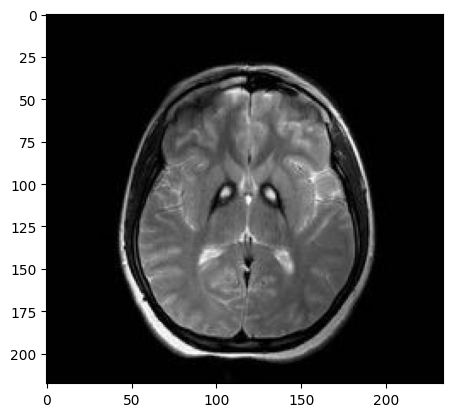

In [ ]:
test_image = image.load_img("/content/drive/MyDrive/brain/brain_tumor_dataset/no/N1429.jpg")
plt.imshow(test_image)
plt.axis()
plt.show()

In [ ]:
img_array = image.img_to_array(test_image.resize((150, 150)))
img_array = np.expand_dims(img_array,axis=0)
img_array/=255
predict_value = model.predict(img_array)
print(predict_value)
if(predict_value>0.5):
    print("Tumor Detected")
else:
  print("No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[9.70956e-27]]
No Tumor Detected
